# 基本畫圖

## 套件
還沒安裝就到終端打入conda install matplotlib並且proceed打y～<br>
畫圖也有別的套件喔，比如seaborn，這裏講解matplotlib的畫圖邏輯，他們部分是可以混用的，邏輯差不多！

In [2]:
import matplotlib.pyplot as plt

## 如何顯示中文？
這個套件會預設是英文字體，如果輸入中文會出現error。<br>
因此，可以透過指定全域或者個別項目指定字體，這裡示範全域字體：第一步是要找到個人電腦裡面的字體檔案位址！<br>
例如我的mac上黑體的位置在/System/Library/Fonts/STHeiti Light.ttc<br>
我的標楷體在/Users/Grace/Library/Fonts/BiauKai.ttf<br>
然後如下輸入到matplotlib的字體裡，並且全域指定為該字體。<br>
note: .ttf和.ttc都是字體的副檔名～

In [397]:
# 以下程式碼為：利用某字體路徑，指定現在畫圖使用的字體全部為該字體

import matplotlib.font_manager as font_manager
font_path = '/System/Library/Fonts/STHeiti Light.ttc'  # 每個人的字體位址不同！自己要輸入自己的～
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()          # 將現在畫圖的字體指定為我的STHeiti Light

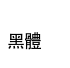

In [126]:
# 示範「黑體」樣式

plt.figure(figsize = (1,1))
plt.axis("off")
plt.annotate("黑體",(0,0.25),size = 18)
plt.show()

In [362]:
# 以下程式碼為：利用某字體路徑，指定現在畫圖使用的字體全部為該字體

font_path = '/Users/Grace/Library/Fonts/BiauKai.ttf'  # 每個人的字體位址不同！自己要輸入自己的～
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()         # 將現在畫圖的字體指定為我的Biaukai

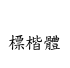

In [138]:
# 示範「標楷體」樣式

plt.figure(figsize = (1,1))
plt.axis("off")
plt.annotate("標楷體",(0,0.25),size = 18)
plt.show()

## 基礎畫圖邏輯:認識圖的部位、儲存圖片

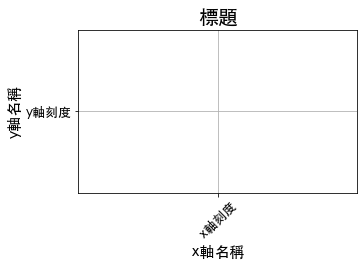

In [315]:
# 圖片大小
plt.figure(figsize = (5,3))

# 圖片標題
plt.title("標題",size = 20)    

# 將x軸上的0.5位置命名為"x軸刻度"
plt.xticks([0.5],        # 先填入[欲取代的刻度]
           ["x軸刻度"],   # 後填入[以什麼取代]
           size = 13,
           rotation = 45)

# 將x軸上的0.5位置命名為"x軸刻度"
plt.yticks([0.5],        # 先填入[欲取代的刻度]
           ["y軸刻度"],   # 後填入[以什麼取代]
           size = 13)

# 顯示圖上的格子
plt.grid()  


# 軸標籤
plt.xlabel("x軸名稱",
           size = 15)


plt.ylabel("y軸名稱",
           size = 15)
#=======================以下注意順序========================
# 儲存圖片，要放在plt.show()以前！！！不然會存到空白圖
# 他會直接覆蓋喔要小心每張圖要改檔名
plt.savefig('first plot.png')  

# 顯示圖片
plt.show()  

## 全部一起指定畫圖參數

繪圖參數是一本字典，叫做plt.rcParams<br>
recall: 剛剛有指定過'font.family':prop.get_name()到rcParams中，是加到同一本參數字典！

In [153]:
# 懶得每次調整可以固定一組參數！
# 可指定參數：https://matplotlib.org/stable/api/matplotlib_configuration_api.html

parameters = {'axes.labelsize': 16,  # 指定label size
             'axes.titlesize': 20,   # 指定title size
             'xtick.labelsize':13,   # 指定x軸上的刻度標籤size
             'figure.figsize':(5,3)} # 指定圖片大小  

plt.rcParams.update(parameters)

## 各式圖

* bar chart\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html<br>
pyplot內建的顏色名稱：https://matplotlib.org/stable/gallery/color/named_colors.html

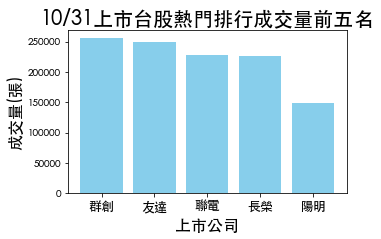

In [314]:
# （此時無需個別指定字體大小或是圖片大小等等！）

plt.title("10/31上市台股熱門排行成交量前五名")    
plt.bar(["群創","友達","聯電","長榮","陽明"],
        [256052,249676,227763,225384,148449],
       color = "skyblue")                   
plt.xlabel("上市公司")
plt.ylabel("成交量(張)")
plt.show() 

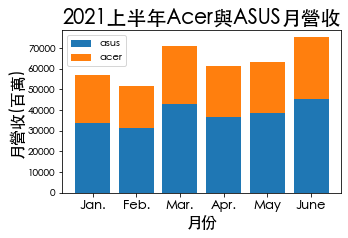

In [326]:
acer = [23495,20318,27744,24950,24807,30019]
asus = [33686,31289,43129,36502,38582,45186]
mon = ["Jan.","Feb.","Mar.","Apr.","May","June"]
plt.title("2021上半年Acer與ASUS月營收")
plt.bar(mon,asus,label = "asus")
plt.bar(mon,acer,label = "acer",bottom = asus)
plt.xlabel("月份")
plt.ylabel("月營收(百萬)")
plt.legend()
plt.show()

* line graph\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

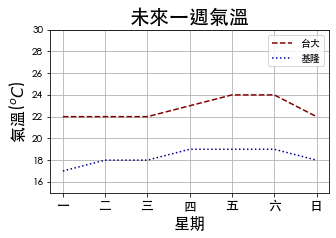

In [215]:
x = ["一","二","三","四","五","六","日"]

plt.title("未來一週氣溫")    
plt.plot(x,
        [22,22,22,23,24,24,22],
        linestyle = "--",label = "台大",color = "#800000")   # 也可以用色碼表指定顏色
plt.plot(x,
        [17,18,18,19,19,19,18],
        linestyle = ":",label = "基隆", color = "darkblue")
plt.ylim(15,30)            # 指定y軸的範圍，分別填入最小值與最大值
plt.xlabel("星期")
plt.ylabel("氣溫($^oC$)")  # 兩個$中間是latex語法，大家可以遇到需求再去查詢～
plt.legend()               # 顯示圖例（記得前面畫圖時要指定label才有東西可以顯示）
plt.grid()
plt.show() 

* pie chart

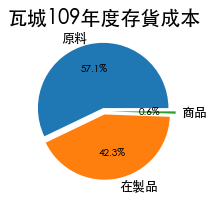

In [192]:
items = ['原料','在製品','商品']
size = [64283,47605,651]
dist = [0.05,0.05,0.1]      # 指定各區塊距離圓心...

plt.title("瓦城109年度存貨成本")
plt.pie(size,
        labels = items,
        explode = dist,
        autopct='%0.1f%%')  #小數點前的數字代表輸出長度（可能要補0）
                            #小數點後代表顯示小數點後幾位
plt.show()

* scatter plot\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

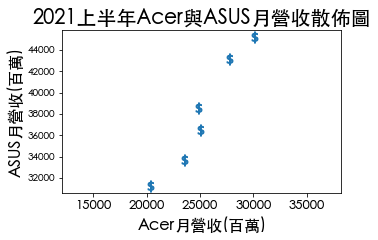

In [300]:
acer = [23495,20318,27744,24950,24807,30019]
asus = [33686,31289,43129,36502,38582,45186]

plt.title("2021上半年Acer與ASUS月營收散佈圖")
plt.scatter(acer,asus,marker = "$\$$",s = 130)
plt.xlabel("Acer月營收(百萬)")
plt.ylabel("ASUS月營收(百萬)")
plt.axis("equal")  # 讓刻度的大小顯示一致
plt.show()

* histogram\
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html<br>

【以下示範CLT】：\
第一步：隨機獲得來自某母體分配的資料\
透過from scipy.stats import expon獲得指數分配相關的套件內容\
expon.rvs(loc=0, scale=10,size=1000)表示對此分配隨機抽取：
$f(x)=\frac{1}{10}e^{(-\frac{1}{10}x)}$

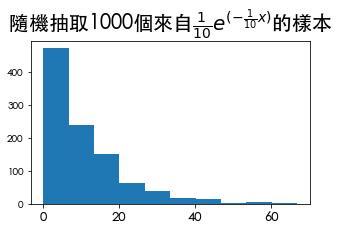

In [216]:
from scipy.stats import expon
r = expon.rvs(0,10,size=1000)
plt.title(r"隨機抽取1000個來自$\frac{1}{10}e^{(-\frac{1}{10}x)}$的樣本")
plt.hist(r)
plt.show()

第二步：
重複抽取多次，得到$\bar{X}$分配

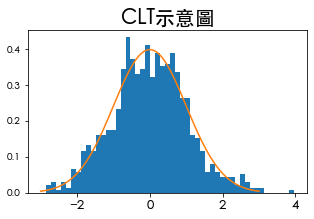

In [270]:
# Drawing histogram and the probability curve together: 'density = True' in plt.hist()
#If density = True, draw and return a probability density: each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).

import numpy as np
from scipy.stats import norm

plt.title("CLT示意圖")
s = 1000     # 抽取1000次
n = 100       # 每次抽100個
xbar = [np.mean(expon.rvs(0,10,size=n)) for i in range(s)]
plt.hist((xbar-np.mean(xbar))/(np.mean(xbar)/np.sqrt(n)),density = True,bins = 50)

# 畫normal的curve
x = np.linspace(-3,3,100)
plt.plot(x, norm.pdf(x, 0, 1))

plt.show()

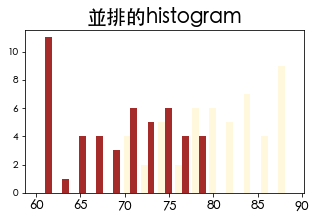

In [310]:
np.random.seed(11031012)   # 固定隨機
A = np.random.randint(70,90,50) # 隨機抽取70~90之間的50個整數
B = np.random.randint(60,80,48)
plt.title("並排的histogram")
plt.hist([A,B],bins = 15,color = ["cornsilk","brown"])
plt.show()

In [202]:
* histogram
透過from scipy.stats import expon獲得指數分配相關的套件內容\
expon.rvs(loc=0, scale=1/10,size=1000)表示隨機抽取以下分配：
$f(x)=\frac{exp(\frac{-x^2}{2})}{\sqrt{2\pi}}$

SyntaxError: invalid syntax (2955237782.py, line 2)

## 疊圖

## 應用：中央極限定理

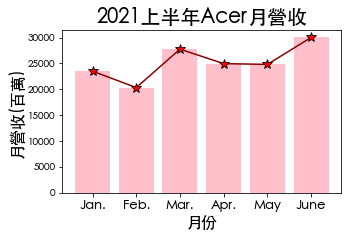

In [349]:
acer = [23495,20318,27744,24950,24807,30019]
mon = ["Jan.","Feb.","Mar.","Apr.","May","June"]
plt.title("2021上半年Acer月營收")
plt.plot(mon,acer,color = "darkred"
         ,marker = "*",ms = 11,markerfacecolor = 'r',markeredgecolor = 'k',markeredgewidth=0.8)
plt.bar(mon,acer,color = "pink")
plt.xlabel("月份")
plt.ylabel("月營收(百萬)")
plt.show()

## 好看的主題、一次多圖

In [350]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


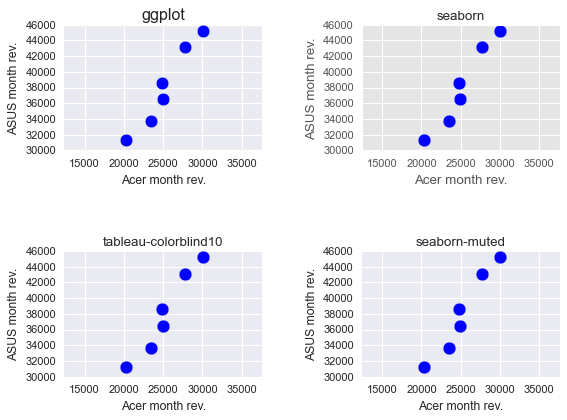

In [395]:
theme = ["ggplot","seaborn","tableau-colorblind10", 'seaborn-muted']

acer = [23495,20318,27744,24950,24807,30019]
asus = [33686,31289,43129,36502,38582,45186]

for i in range(4):
    plt.subplot(2,2,i+1)    # 在2*2的圖中，排列第幾個
    plt.style.use(theme[i])
    plt.title(theme[i])
    plt.scatter(acer,asus,s = 130)
    plt.xlabel("Acer month rev.")
    plt.ylabel("ASUS month rev.")
    plt.axis("equal")  # 讓刻度的大小顯示一致

plt.subplots_adjust(wspace=0.5,hspace=0.8) # 調整子圖間距
plt.show()  # show記得放一次就好

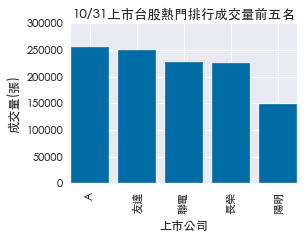

In [398]:
plt.subplot(2,2,1)

plt.style.use("tableau-colorblind10")
plt.title("10/31上市台股熱門排行成交量前五名")    
plt.bar(["A","友達","聯電","長榮","陽明"],
        [256052,249676,227763,225384,148449])  
plt.xticks(rotation = 90)
plt.xlabel("上市公司")
plt.ylabel("成交量(張)")
plt.show()

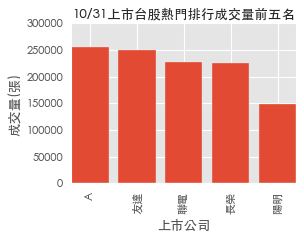

In [400]:
plt.subplot(2,2,1)

plt.style.use("seaborn")
plt.title("10/31上市台股熱門排行成交量前五名")    
plt.bar(["A","友達","聯電","長榮","陽明"],
        [256052,249676,227763,225384,148449])  
plt.xticks(rotation = 90)
plt.xlabel("上市公司")
plt.ylabel("成交量(張)")
plt.show()

# 互動式圖表